# Explore Notebook

In [102]:
import wrangle as w

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats 

## Calling `wrangle.py` module to wrangle data

311_service_data.csv read complete.
There are 521590 rows and 17 columns in 311_service_data.csv.

med_incomebyzip.csv read complete.
There are 60 rows and 7 columns in med_incomebyzip.csv.

Left DF Zip Column Ready for Merge.
Right DF Zip Column Ready for Merge.
DFs Merged.
There are 436576 rows and 23 columns in the merged df.



/Users/stephanie/codeup-data-science/311_service_calls/wrangle.py:127: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.avg_inc = df.avg_inc.str.replace('$', '').str.replace(',', '').astype(float)


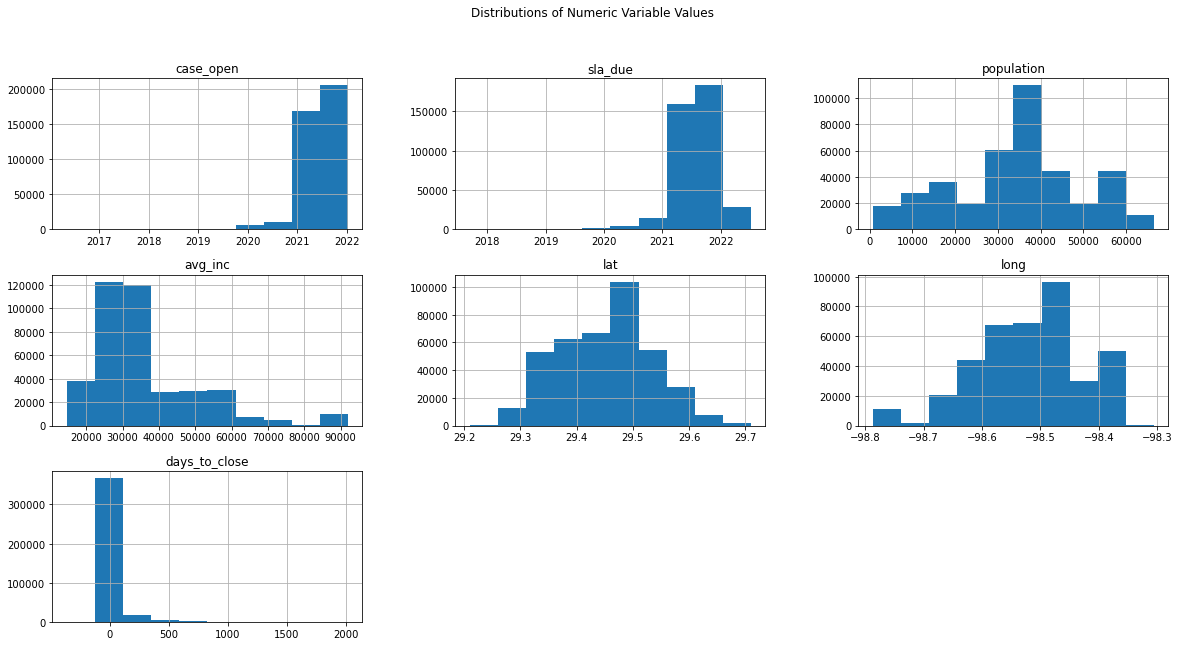

Object List:
['category', 'dept', 'dept_div', 'sourceid', 'council_distr', 'zip']

Integer List:
['population', 'days_to_close']

Bool List:
['sla_late']

Float List:
['avg_inc', 'lat', 'long']

Dates List:
['case_open', 'sla_due']

There are 390069 rows and 14 columns in the cleaned df.
DataFrame is cleaned and ready for splitting.
Data has been split.
train -> (218438, 14)
validate -> (93617, 14)
test -> (78014, 14)



In [2]:
train, validate, test = w.split_data(w.clean_data(w.merge_data(df_left = w.acquire_data('311_service_data.csv')\
                                                               , df_right = w.acquire_data('med_incomebyzip.csv'))))

#### I will create dtype lists in case I want to break out my variables for unique exploration.

In [3]:
obj_cols = ['category', 'dept', 'dept_div', 'sourceid', 'council_distr', 'zip']
int_cols = ['population', 'days_to_close']
bool_cols = ['sla_late']
date_cols = ['case_open', 'sla_due']

### First I want to look at the distributions of each individual variable.

CATEGORY
The category column has 9 values.


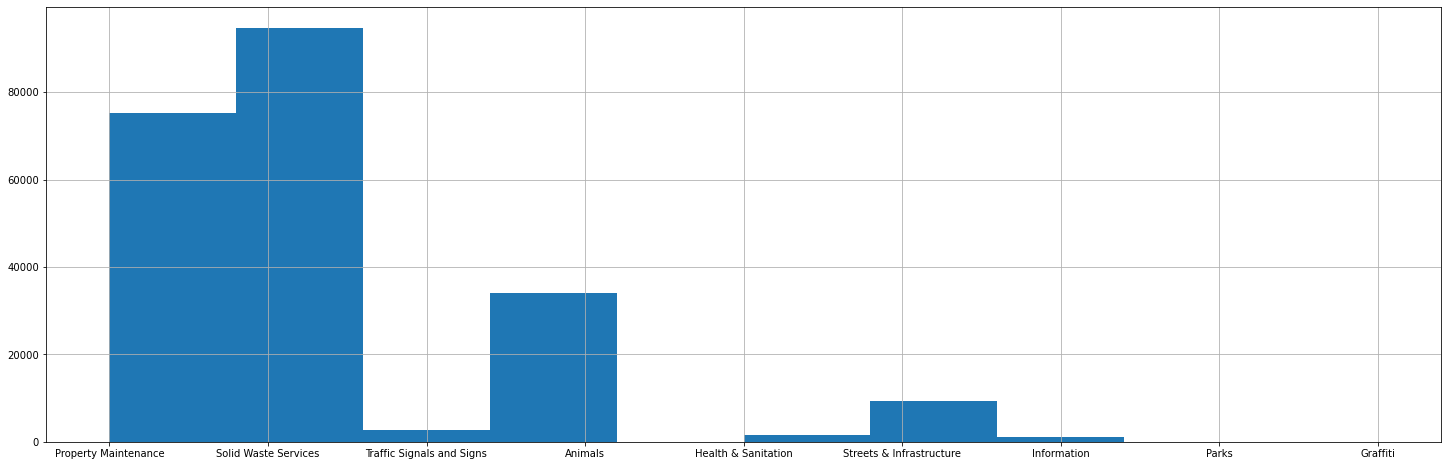

---------------------------------------------------------

CASE_OPEN
The case_open column has 840 values.


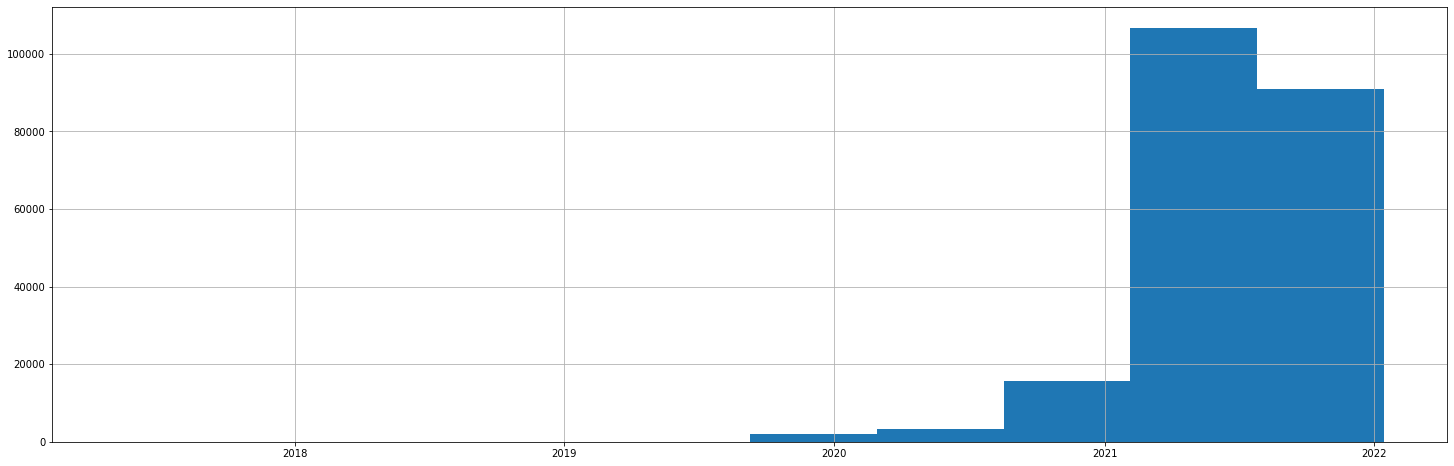

---------------------------------------------------------

SLA_DUE
The sla_due column has 855 values.


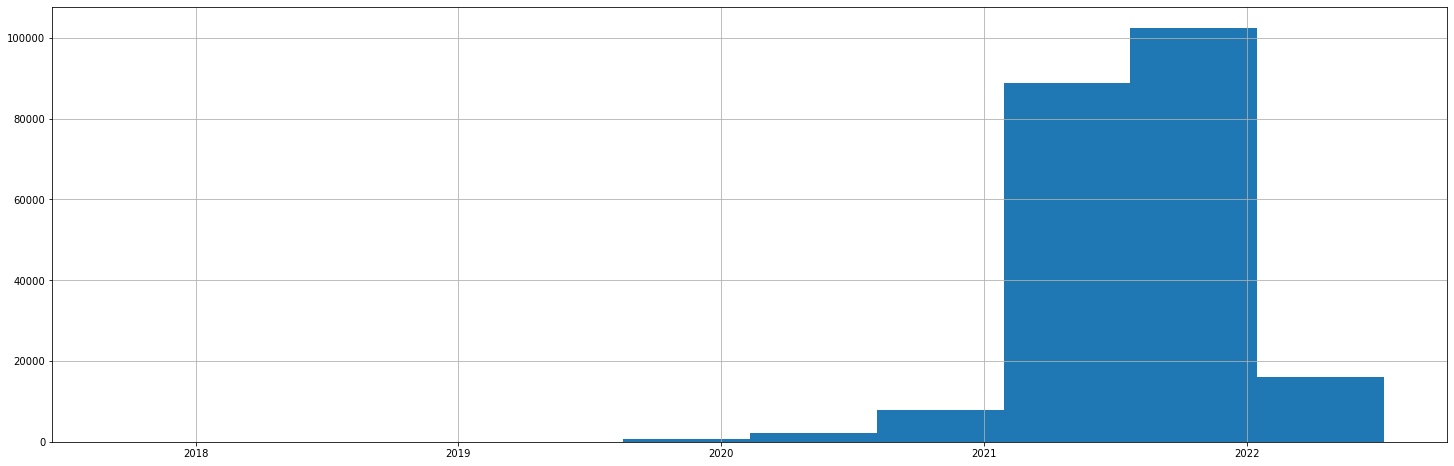

---------------------------------------------------------

SLA_LATE
The sla_late column has 2 values.


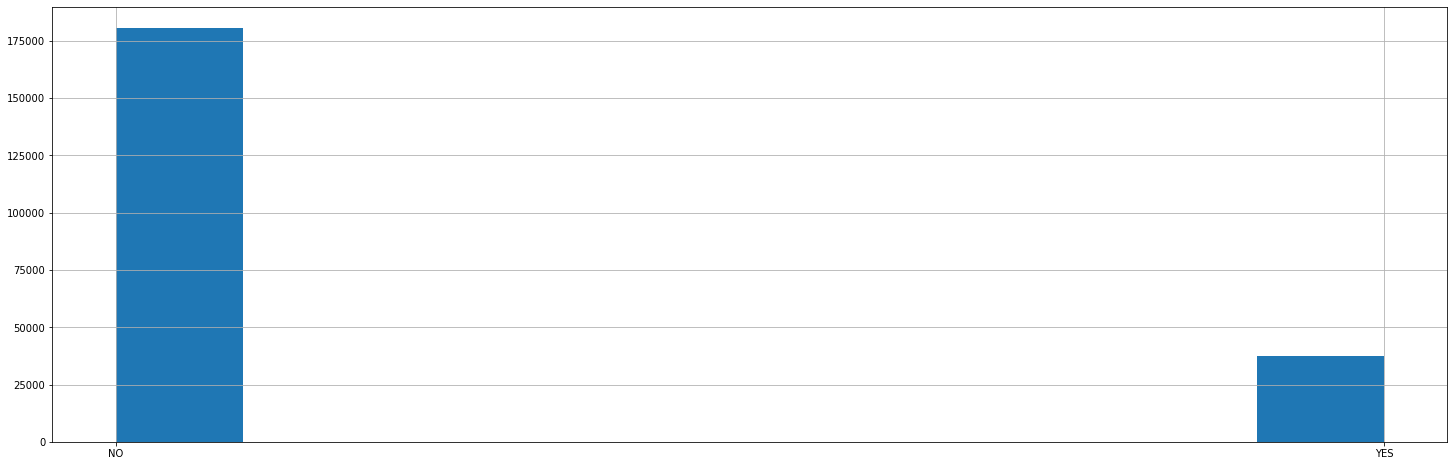

---------------------------------------------------------

DEPT
The dept column has 7 values.


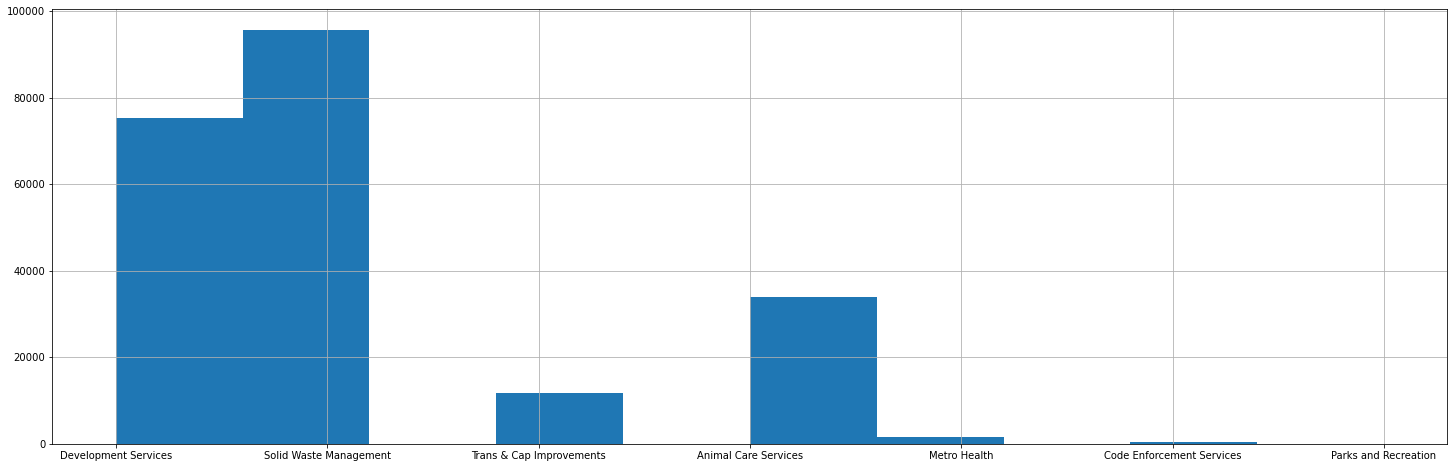

---------------------------------------------------------

DEPT_DIV
The dept_div column has 21 values.


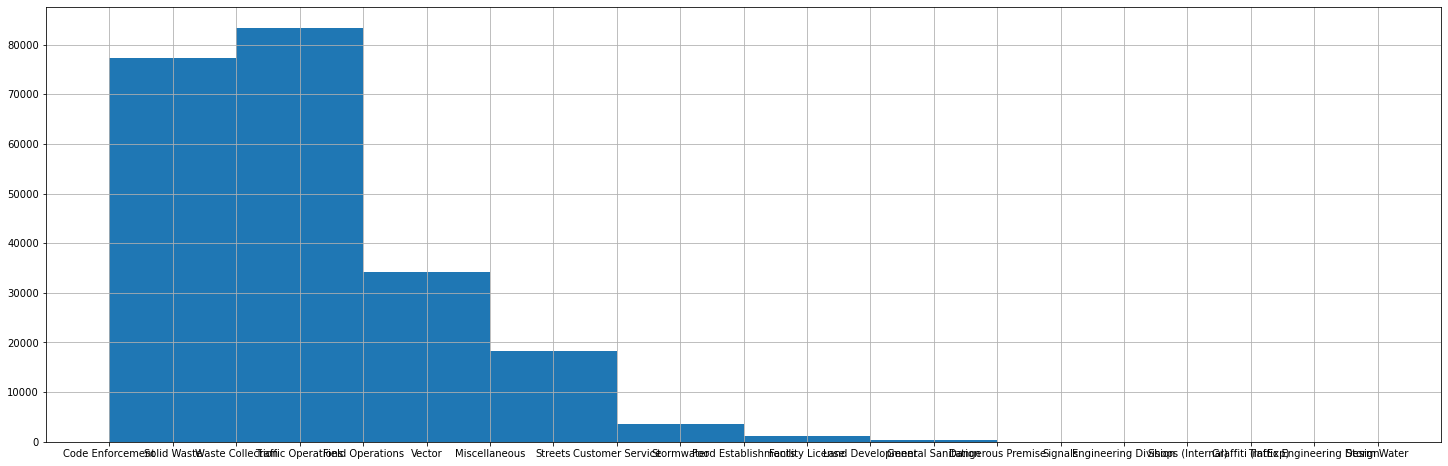

---------------------------------------------------------

SOURCEID
The sourceid column has 4 values.


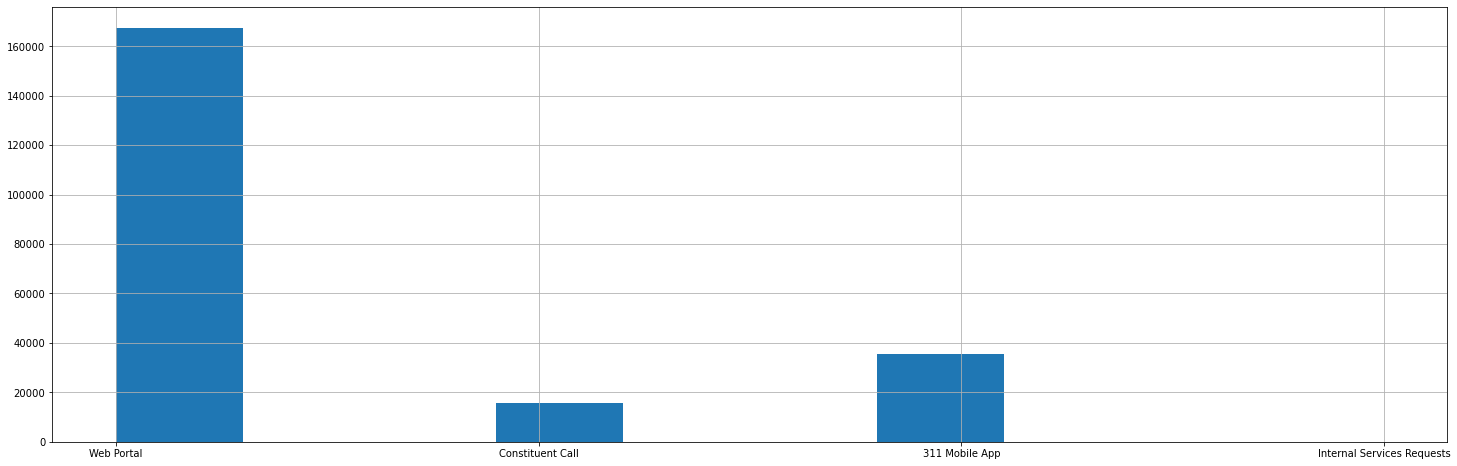

---------------------------------------------------------

COUNCIL_DISTR
The council_distr column has 11 values.


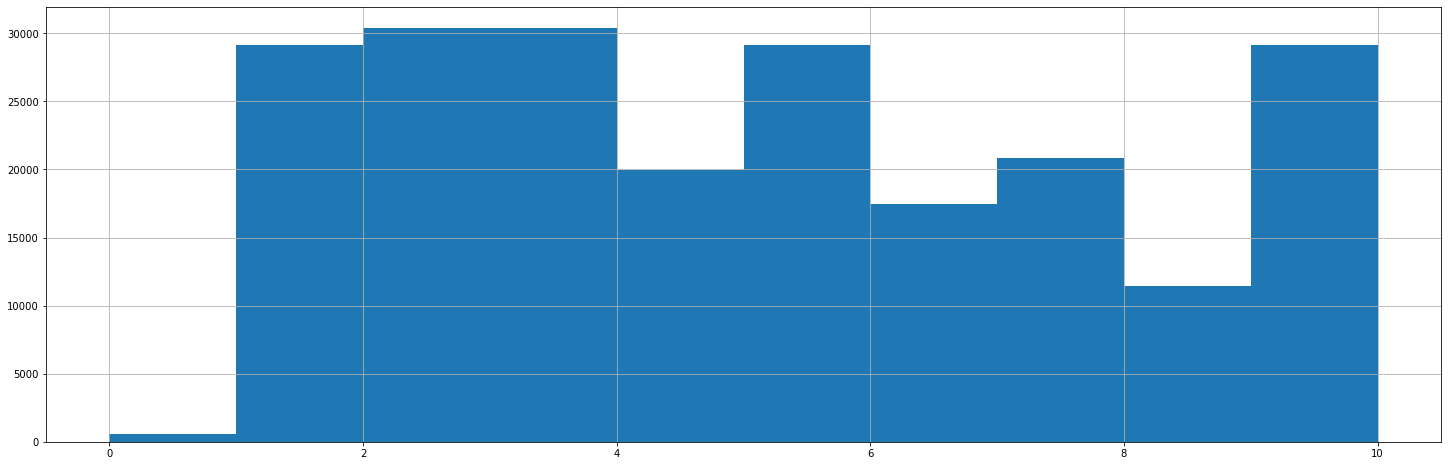

---------------------------------------------------------

ZIP
The zip column has 60 values.


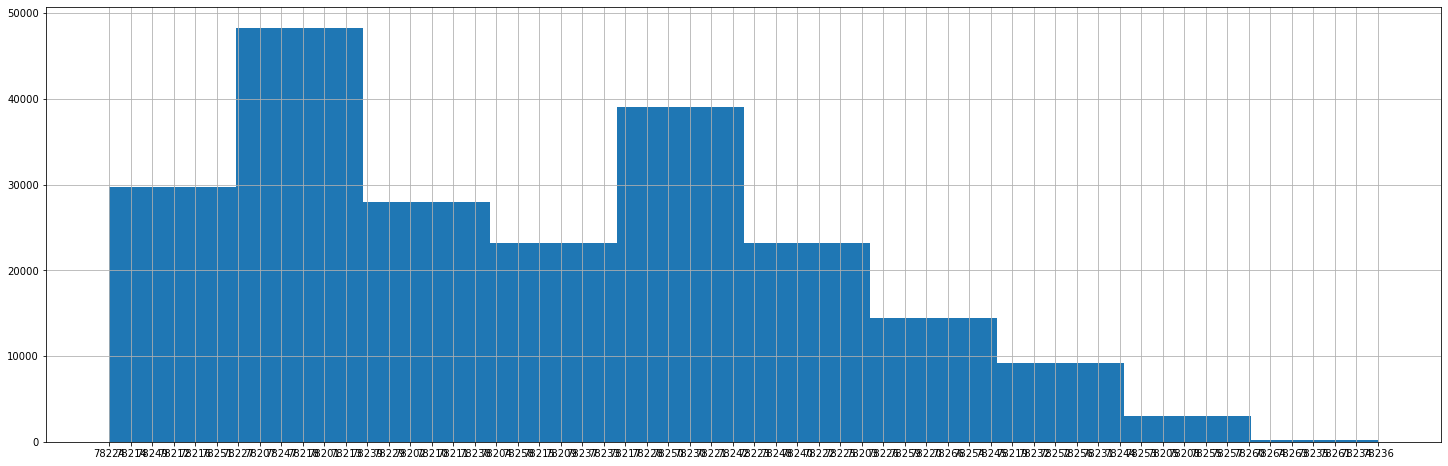

---------------------------------------------------------

POPULATION
The population column has 60 values.


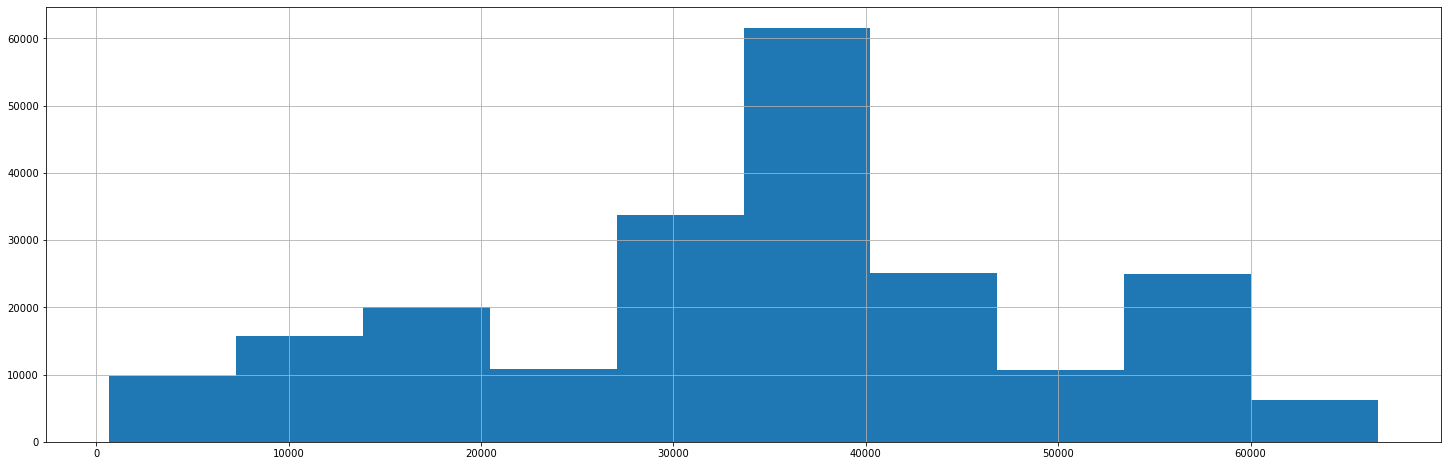

---------------------------------------------------------

AVG_INC
The avg_inc column has 60 values.


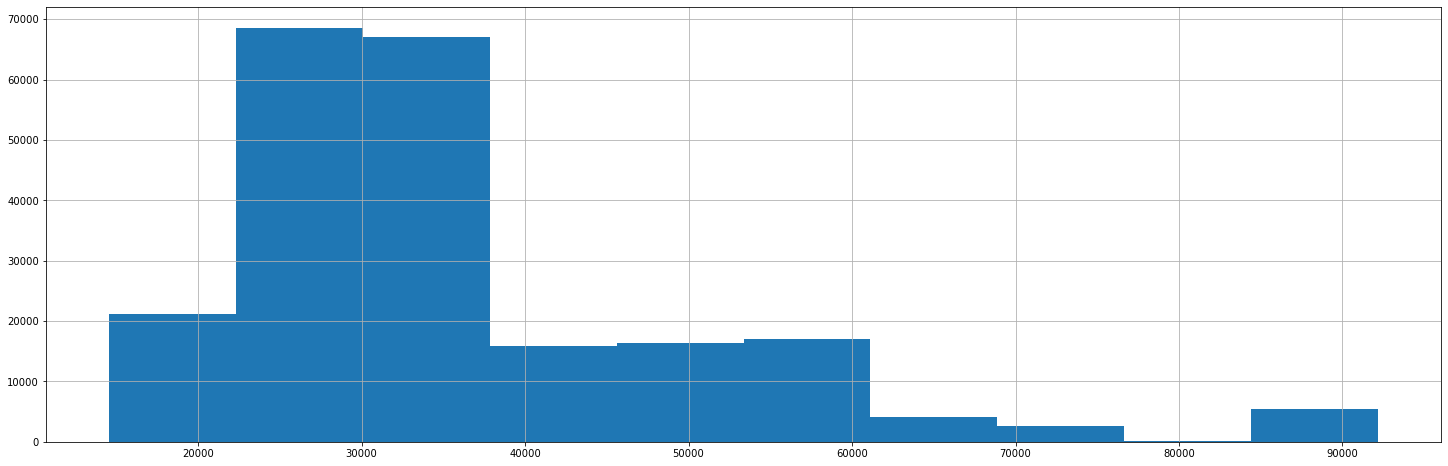

---------------------------------------------------------

LAT
The lat column has 59 values.


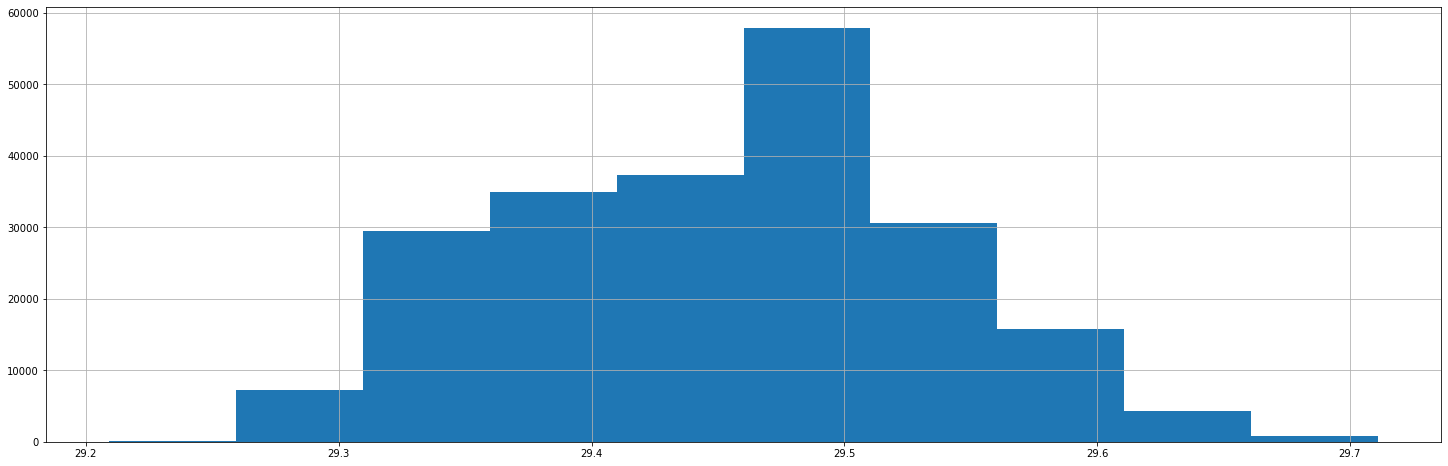

---------------------------------------------------------

LONG
The long column has 60 values.


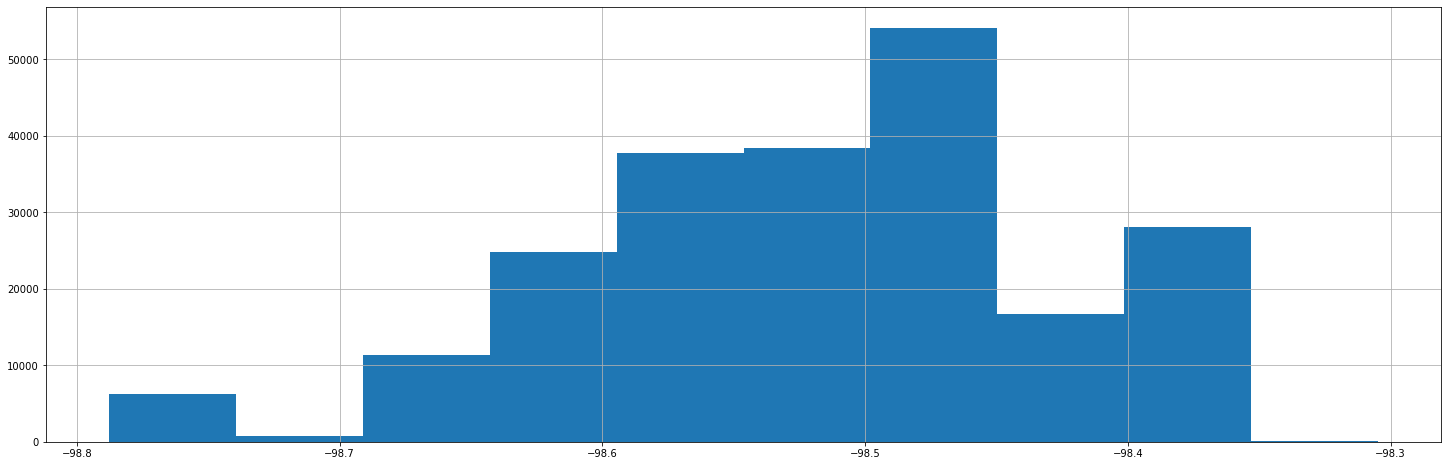

---------------------------------------------------------

DAYS_TO_CLOSE
The days_to_close column has 655 values.


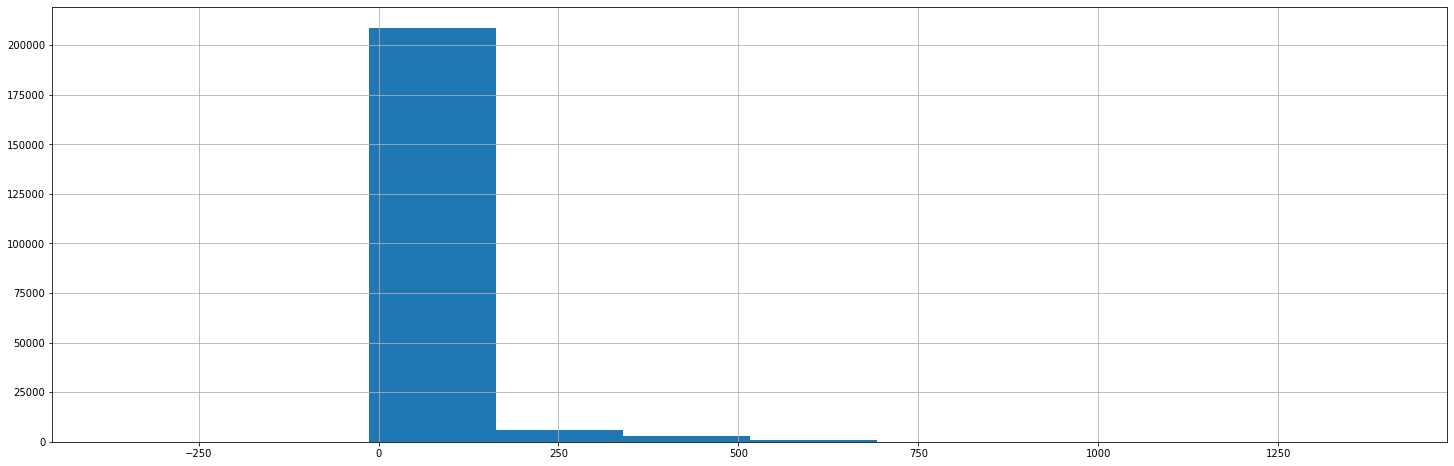

---------------------------------------------------------



In [36]:
# object columns: unique values and distributions
for col in train.columns:
    print(col.upper())
    print(f'The {col} column has {train[col].nunique()} values.')
    train[col].hist(figsize = (25, 8))
    plt.show();
#     if train[col].nunique() < 22:
#         print(train[col].value_counts().sort_values(ascending = False))
    print('---------------------------------------------------------')
    print()

#### Looking at the report with `No Category` listed as category

In [5]:
# filtering the train data to only see the report with the No Category category value
train[train.category == 'No Category']

,category,case_open,sla_due,sla_late,dept,dept_div,sourceid,council_distr,zip,population,avg_inc,lat,long,days_to_close
84895,No Category,2021-08-09,2021-12-14,NO,Development Services,Code Enforcement,311 Mobile App,5,78228,58091,30852.0,29.460646,-98.571279,0


>#### This was reported the `dept_div` `Code Enforcement` so i will look and see if any one particular category makes up most of these kinds of reports and then update the `No Category` to that majority `category`

In [6]:
# filtering the data to see the categories of the Code Enforcement department division
train[train.dept_div == 'Code Enforcement'].category.value_counts()

Property Maintenance    75213
Graffiti                    2
No Category                 1
Name: category, dtype: int64

>#### `Property Maintenance` is the most common value so I will update `No Category` to that one.

In [7]:
# changing the category value in this report to Property Maintenance
train.category[84895] = 'Property Maintenance'

In [8]:
# verifying the value was changed
train.category[84895]

'Property Maintenance'

### Looking at the 311 reports with `days_to_close` < 0 (negative)

In [56]:
train[train.days_to_close < 0]

,category,case_open,sla_due,sla_late,dept,dept_div,sourceid,council_distr,zip,population,avg_inc,lat,long,days_to_close
309387,Solid Waste Services,2021-05-07,2021-05-13,NO,Solid Waste Management,Waste Collection,Web Portal,2,78203,5845,20357.0,29.415255,-98.460204,-1
99924,Solid Waste Services,2021-05-21,2021-05-23,NO,Solid Waste Management,Miscellaneous,Web Portal,7,78201,47387,26725.0,29.469087,-98.529395,-1
374499,Solid Waste Services,2021-03-16,2021-03-18,NO,Solid Waste Management,Miscellaneous,Web Portal,9,78258,17355,91509.0,29.647111,-98.500768,-4
288555,Solid Waste Services,2021-06-11,2021-06-17,NO,Solid Waste Management,Waste Collection,Web Portal,9,78216,37282,35324.0,29.538739,-98.491258,-2
185078,Solid Waste Services,2021-03-01,2021-03-03,NO,Solid Waste Management,Miscellaneous,Web Portal,3,78221,36889,29330.0,29.261882,-98.483653,-6
96518,Solid Waste Services,2021-03-23,2021-03-25,NO,Solid Waste Management,Miscellaneous,Web Portal,7,78201,47387,26725.0,29.469087,-98.529395,-1
327391,Information,2021-08-16,2021-08-23,NO,Solid Waste Management,Customer Service,Web Portal,8,78249,34190,58101.0,29.574047,-98.600797,-24
116041,Solid Waste Services,2021-05-02,2021-05-04,NO,Solid Waste Management,Miscellaneous,Web Portal,1,78212,31220,30299.0,29.464611,-98.493653,-5
228318,Solid Waste Services,2021-02-04,2021-02-06,NO,Solid Waste Management,Miscellaneous,Web Portal,5,78207,56348,20117.0,29.422300,-98.524805,-2
78306,Solid Waste Services,2021-05-06,2021-05-08,NO,Solid Waste Management,Miscellaneous,Web Portal,5,78228,58091,30852.0,29.460646,-98.571279,-1


In [71]:
# filtering out the negative days to close values from train, validate, and test
train = train[train.days_to_close >= 0]
validate = validate[validate.days_to_close >= 0]
test = test[test.days_to_close >= 0]

### Something interesting is going on with the target `days_to_close`...
It was severely left skewed so I want to look at some quantile distributions

In [75]:
pd.qcut(train.days_to_close, 2).value_counts()

(-0.001, 2.0]    112550
(2.0, 1397.0]    105876
Name: days_to_close, dtype: int64

### Half of the reports were close in under x2 days. 
The cases had a much greater range is `days_to_clse` between 2 and 1_397 days. 

## Q1. Which of the continuous variables is most correlated with the target, `days to close`?

<AxesSubplot:>

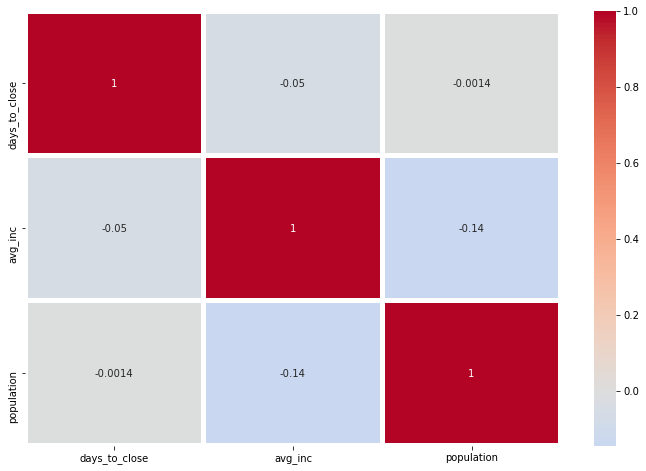

In [221]:
# creating a list of continuous variables
contin_vars = ['days_to_close', 'avg_inc', 'population']

plt.figure(figsize = (12, 8))
sns.heatmap(train[contin_vars].corr(), annot=True, cmap="coolwarm", center = 0, linewidths=4, linecolor='white')

### Unable to find strong correlations between continuous vars and target based on heatmap
Since some of these are not normally distributed, I will run a `spearmansr` statistical test to test the significance of the correlations, or lackthereof.
- $H$o: There is no linear correlation between `days_to_close` and `avg_income`.
- $H$a: There is no linear correlation between `days_to_close` and `avg_income`.
- alpha: .05

In [103]:
r, p = stats.spearmanr(train['days_to_close'], train['avg_inc'])
print(f'The r-value or correlation coefficient is: {round(r, 2)}')
print(f'The p-value is: {p}\nThere is {round(p, 1)}% chance that we see these results by chance.')

The r-value or correlation coefficient is: 0.02
The p-value is: 5.598995325179636e-28
There is 0.0% chance that we see these results by chance.


### Unable to find strong correlations between continuous vars and target
Since some of these are not normally distributed, I will run a `spearmansr` statistical test to test the significance of the correlations, or lackthereof.
- $H$o: There is no linear correlation between `days_to_close` and `population`.
- $H$a: There is no linear correlation between `days_to_close` and `population`.
- alpha: .05

In [104]:
r, p = stats.spearmanr(train['days_to_close'], train['population'])
print(f'The r-value or correlation coefficient is: {round(r, 2)}')
print(f'The p-value is: {p}\nThere is {round(p, 1)}% chance that we see these results by chance.')

The r-value or correlation coefficient is: 0.01
The p-value is: 6.708030050925223e-09
There is 0.0% chance that we see these results by chance.


### Both correlation tests confirm that there is a very weak linear relationship between the two continuous variables and the target and that these findings are signifcant.
These would not be good features to include in the model.


### Going to look a pairplot of the variables, one without and another with a hue of `sla_late`

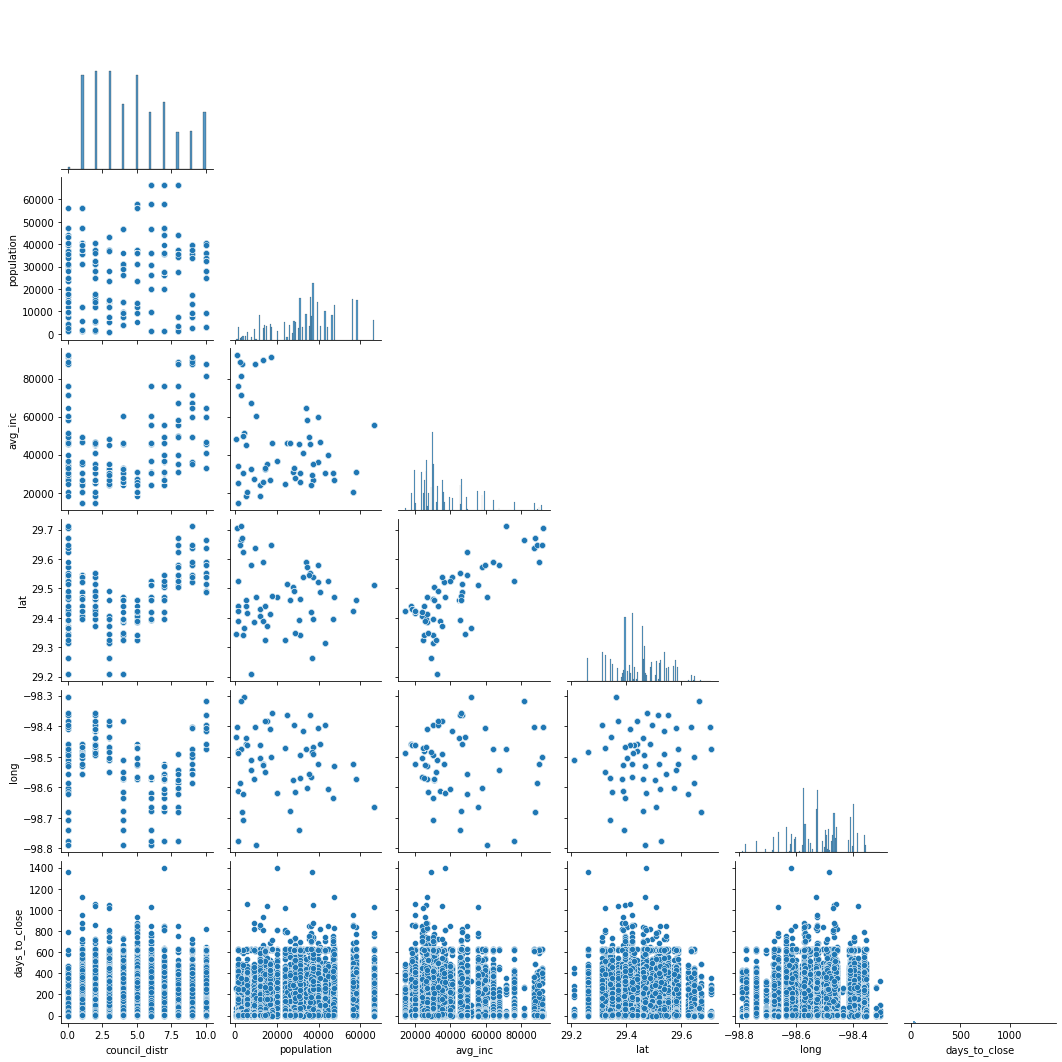

In [105]:
sns.pairplot(data=train, corner=True)

In [108]:
train.sla_late.value_counts()

NO     180782
YES     37644
Name: sla_late, dtype: int64

### Going to set `sla_late` column as hue

In [109]:
sns.pairplot(data=train, corner=True, hue = train.sla_late)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### Getting an error, wondering if this is because of column dtype == object instead of bull
Will get dummies and try again...

In [116]:
train.sla_late = pd.get_dummies(train.sla_late, drop_first = True).rename(columns = {'YES':'sla_late'})

TypeError: No loop matching the specified signature and casting was found for ufunc add

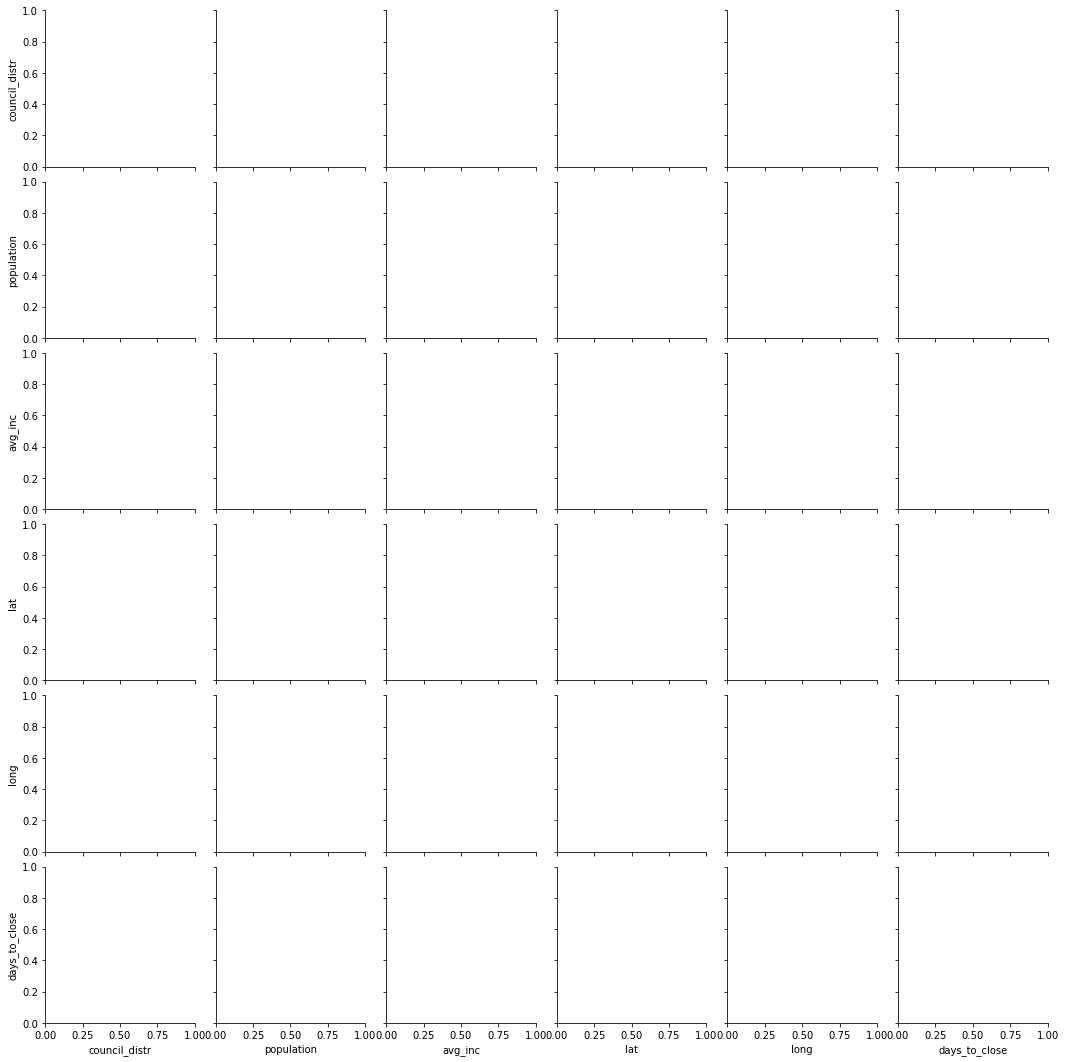

In [119]:
sns.pairplot(data=train, hue = 'sla_late')

### Still getting an error... will plot manually

In [128]:
plot_cat = []

for col in train.columns:
    if train[col].nunique() < 12:
        plot_cat.append(col)

In [129]:
plot_cat

['category', 'sla_late', 'dept', 'sourceid', 'council_distr']

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


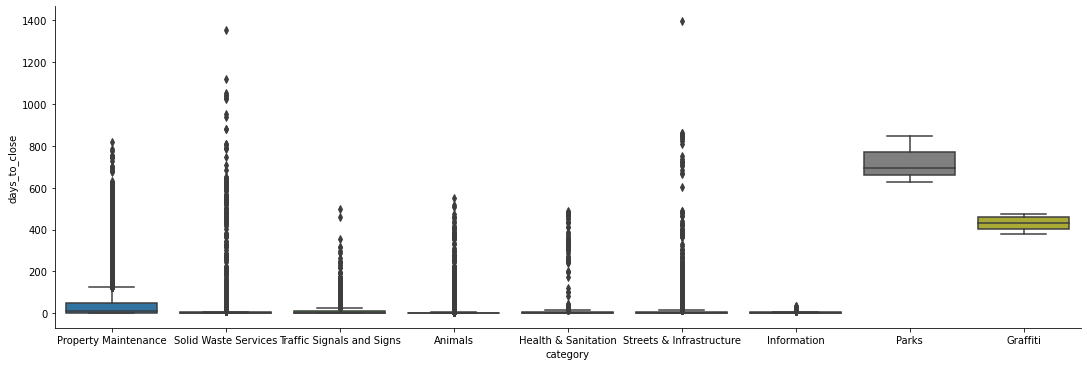

In [138]:
sns.catplot(x = 'category', y = 'days_to_close', data = train, kind = 'box', ax = ax, aspect = 3)
plt.show();

### Although the `parks` and `graffiti` make up the smallest percentages of service report categories, they have the highest average days to close. 
I also want to know, along with the days to close, which categories are closing after sla late due. I will set the hue argument to that boolean value.

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


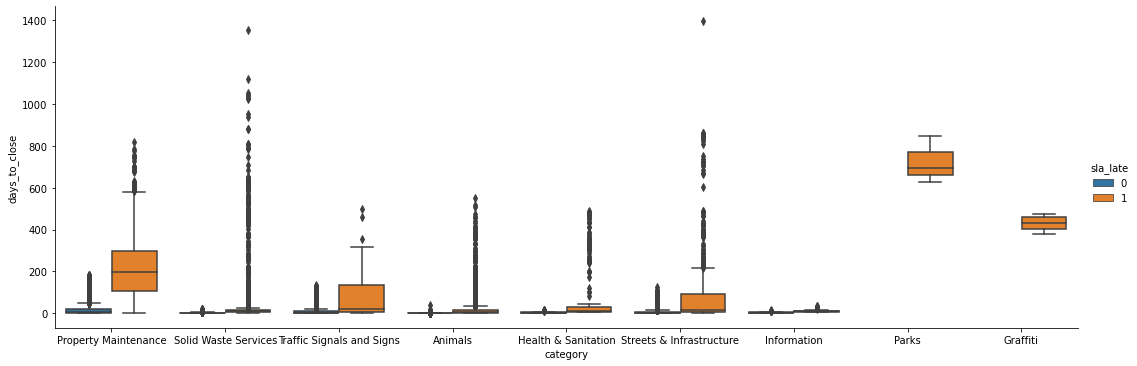

In [139]:
sns.catplot(x = 'category', y = 'days_to_close', data = train, kind = 'box', ax = ax, aspect = 3, hue = 'sla_late')
plt.show();

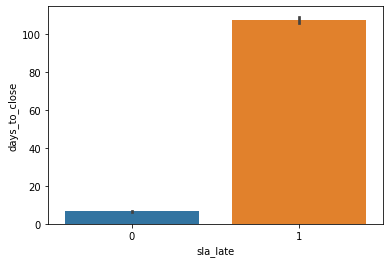

In [223]:
sns.barplot(x = 'sla_late', y = 'days_to_close', data = train)
plt.show();

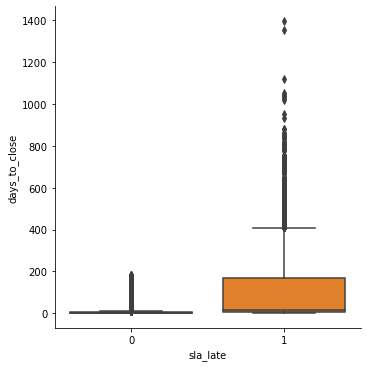

In [140]:
sns.catplot(x = 'sla_late', y = 'days_to_close', data = train, kind = 'box')
plt.show();

<AxesSubplot:xlabel='sourceid', ylabel='count'>

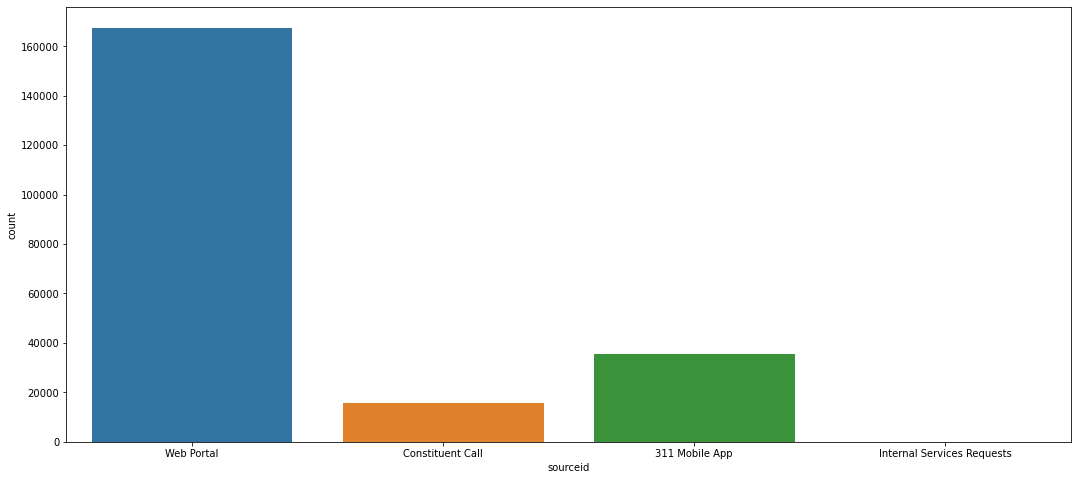

In [231]:
plt.figure(figsize = (18, 8))
sns.countplot(data = train, x = 'sourceid')

<AxesSubplot:xlabel='sourceid', ylabel='days_to_close'>

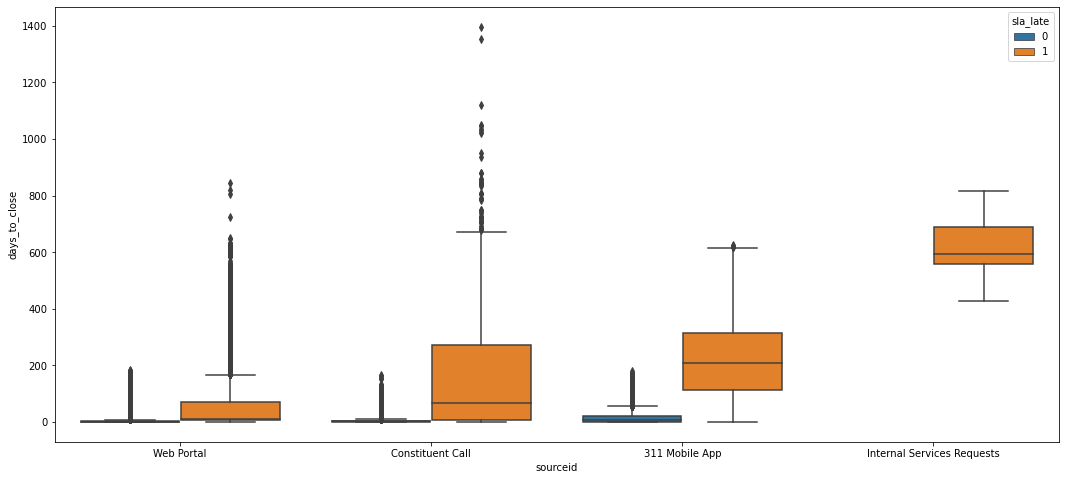

In [236]:
plt.figure(figsize = (18, 8))
sns.boxplot(data = train, x = 'sourceid', y = 'days_to_close', hue = 'sla_late')

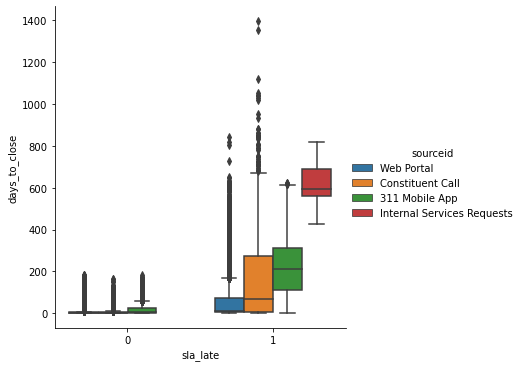

In [141]:
sns.catplot(x = 'sla_late', y = 'days_to_close', data = train, kind = 'box', hue = 'sourceid')
plt.show();

### I wonder if there are issues with the mobile app?
There was a significant investment in getting it going but most of the serice requests are still coming from the web portal and it has the second highest `days_to_close` median of the service requests that are not being closed by their sla date.

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


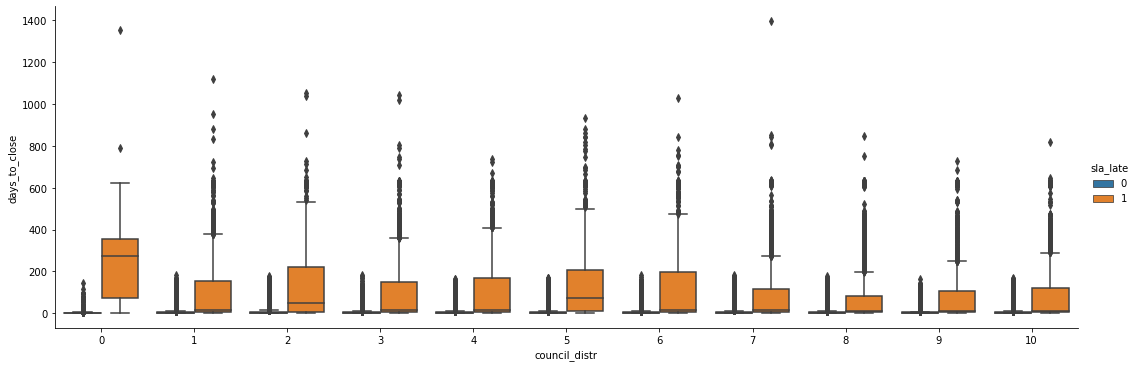

In [143]:
sns.catplot(x = 'council_distr', y = 'days_to_close', data = train, kind = 'box', ax = ax, aspect = 3,\
            hue = 'sla_late')
plt.show();

### Whatever city council district corresponds to `group_0` has a much higher mean value than any of ther other council districts

### What do reporting sources look like across each category?

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


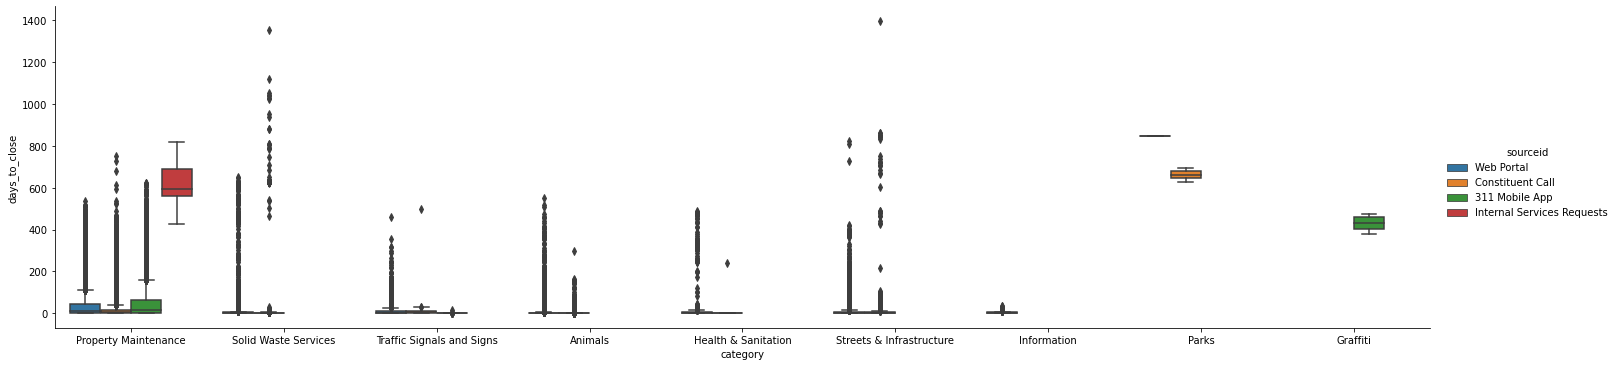

In [145]:
sns.catplot(x = 'category', y = 'days_to_close', data = train, kind = 'box', ax = ax, aspect = 4,\
            hue = 'sourceid')
plt.show();

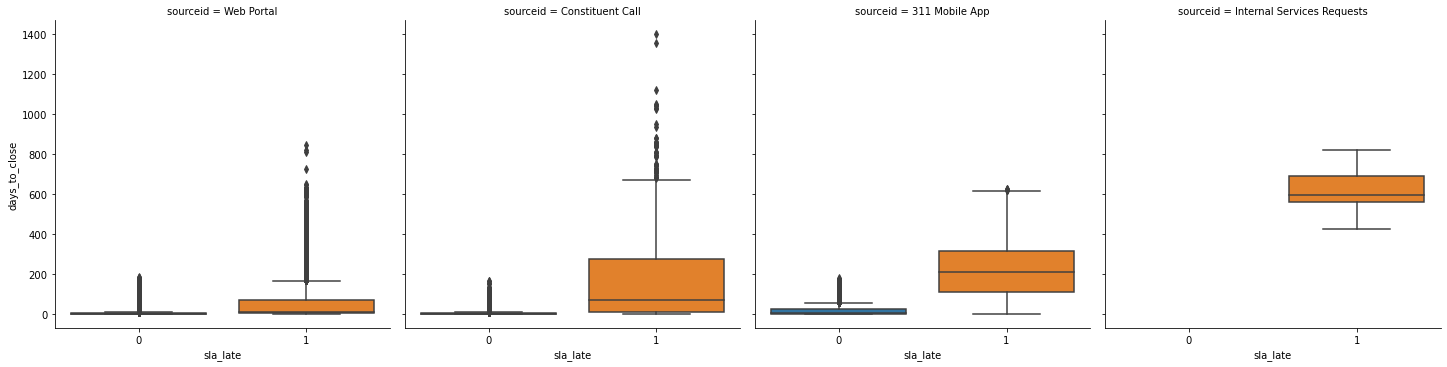

In [151]:
sns.catplot(col = 'sourceid', y = 'days_to_close', data = train, kind = 'box', aspect = 1,\
            x = 'sla_late')
plt.show();

<AxesSubplot:xlabel='sla_late', ylabel='days_to_close'>

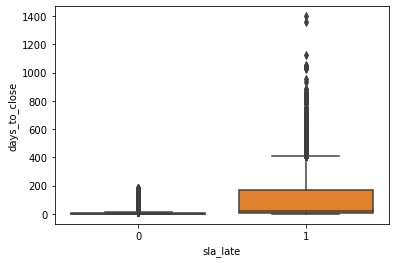

In [157]:
sns.boxplot(data = train, x = 'sla_late', y = 'days_to_close')

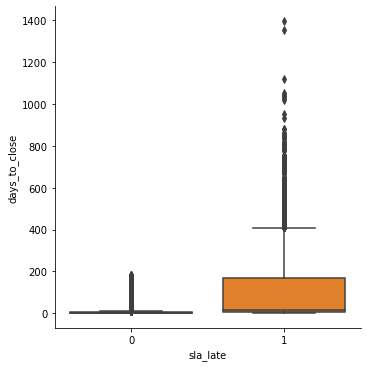

In [160]:
sns.catplot(x = 'sla_late', y = 'days_to_close', data = train, kind = 'box', aspect = 1)
plt.show();

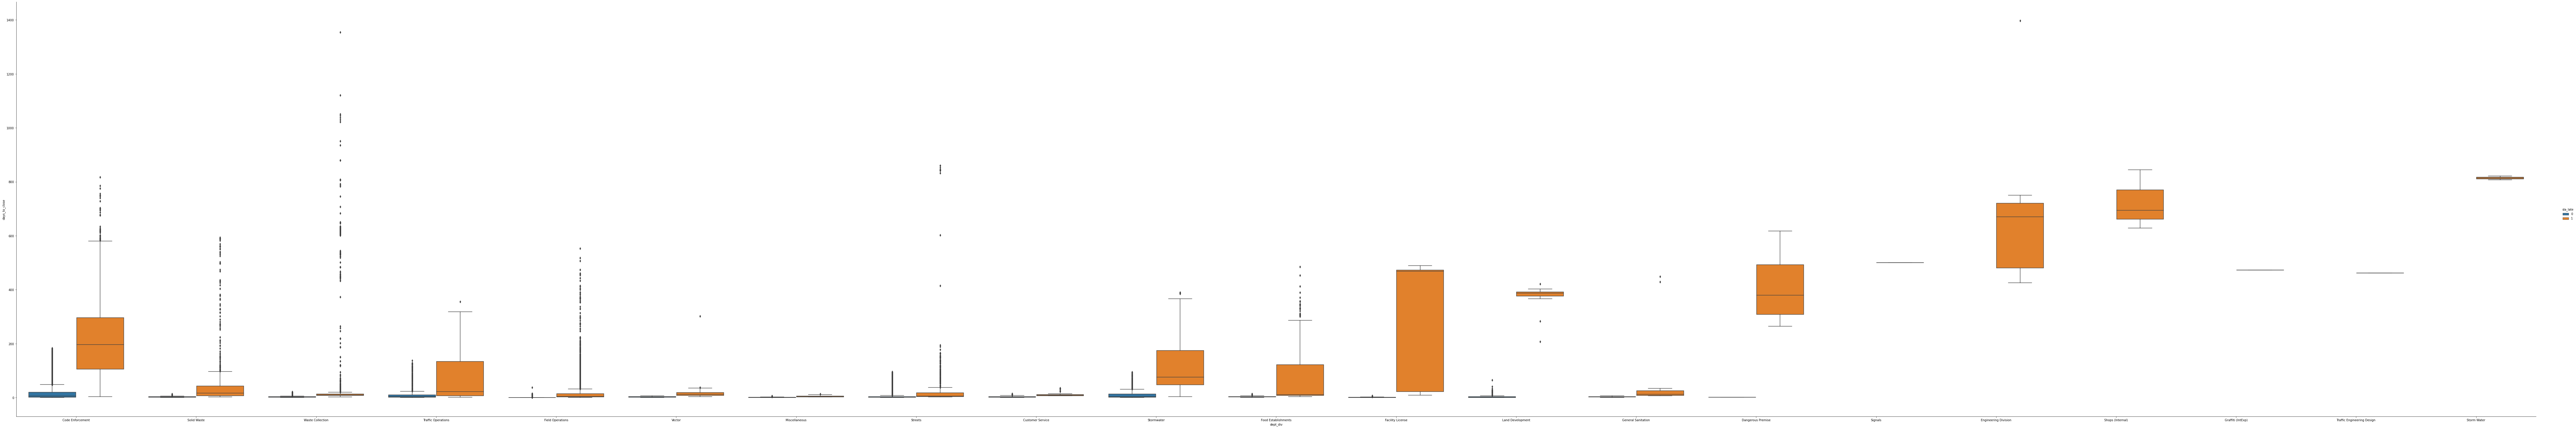

In [170]:
sns.catplot(x = 'dept_div', y = 'days_to_close', data = train, kind = 'box', aspect = 6, hue = 'sla_late',\
            height = 20)
plt.show();

In [237]:
sns.barplot(data = train.groupby('dept_div').mean(), y = 'sla_late', x = 'index')

ValueError: Could not interpret input 'index'

<AxesSubplot:xlabel='category', ylabel='count'>

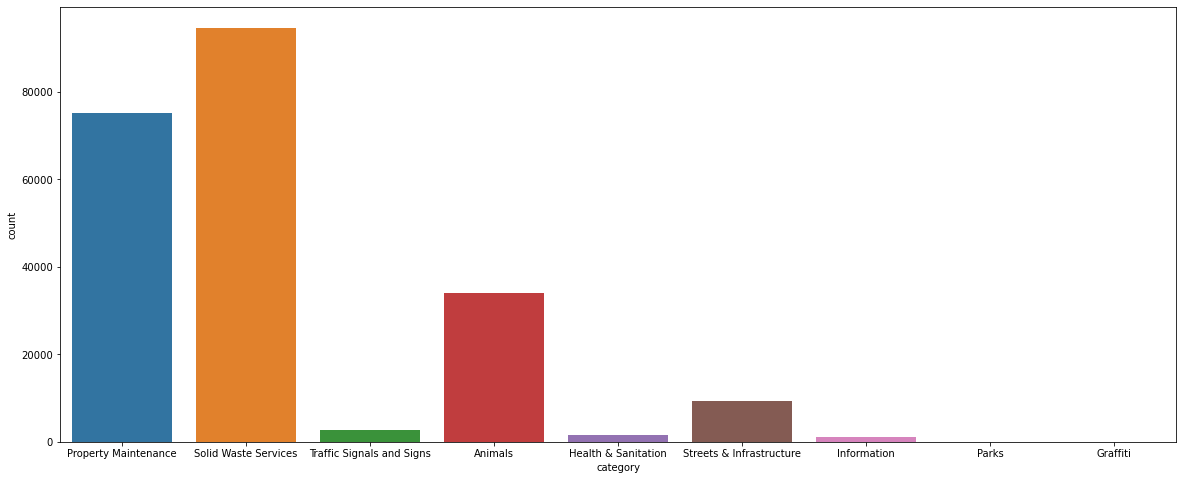

In [228]:
plt.figure(figsize = (20, 8))
sns.countplot(data = train, x = 'category')

<AxesSubplot:ylabel='sla_late'>

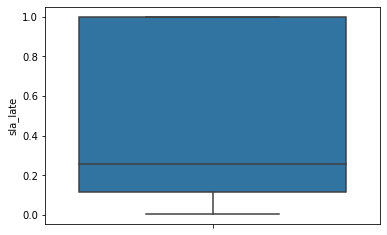

In [178]:
sns.boxplot(y = train.groupby('dept_div').mean().sla_late)
# sns.catplot(x = train.groupby('dept_div').mean(), y = train.groupby('dept_div').mean(), \
#             kind = 'box'

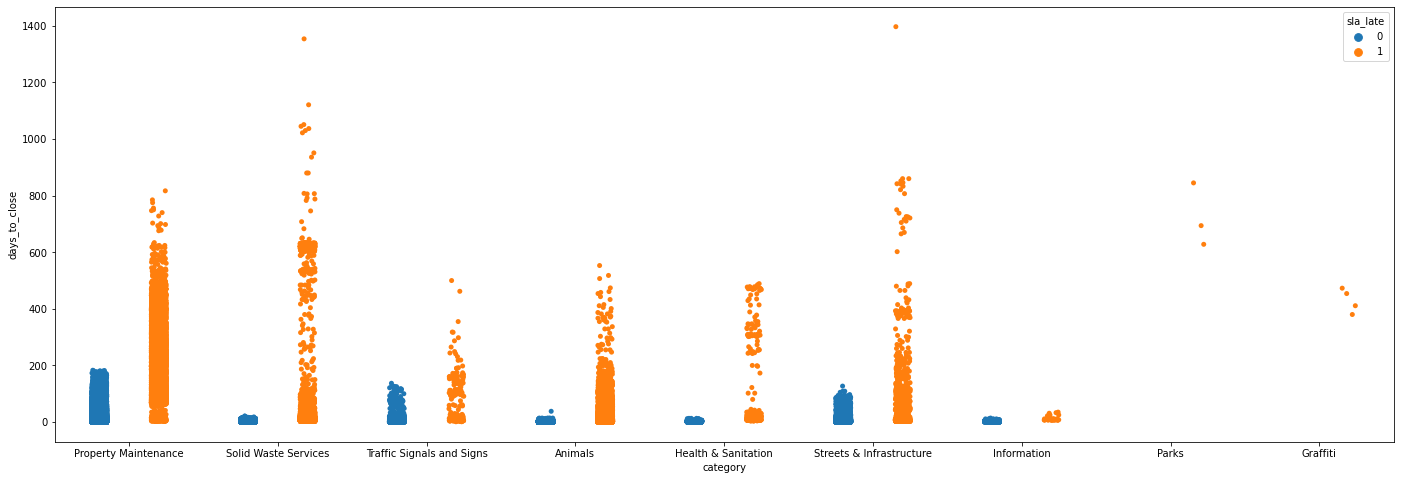

In [203]:
plt.figure(figsize = (24,8))
sns.stripplot(x='category', y='days_to_close', data=train, jitter=True, hue='sla_late', \
              dodge=True)
plt.show();

<AxesSubplot:xlabel='lat', ylabel='long'>

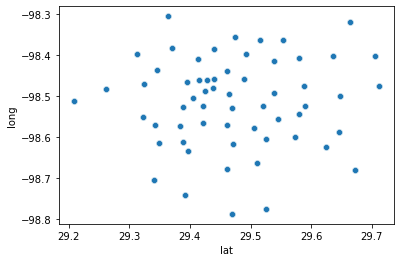

In [208]:
sns.scatterplot(x = train.lat, y = train.long)

<AxesSubplot:xlabel='lat', ylabel='long'>

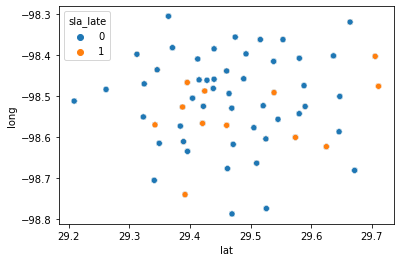

In [211]:
sns.scatterplot(x = train.lat, y = train.long, hue = train.sla_late)

<AxesSubplot:xlabel='lat', ylabel='long'>

/usr/local/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


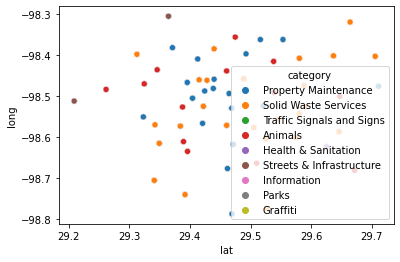

In [212]:
sns.scatterplot(x = train.lat, y = train.long, hue = train.category)

In [241]:
train.category.unique()

array(['Property Maintenance', 'Solid Waste Services',
       'Traffic Signals and Signs', 'Animals', 'Health & Sanitation',
       'Streets & Infrastructure', 'Information', 'Parks', 'Graffiti'],
      dtype=object)

In [242]:
validate.category.unique()

array(['Property Maintenance', 'Animals', 'Solid Waste Services',
       'Traffic Signals and Signs', 'Information',
       'Streets & Infrastructure', 'Health & Sanitation', 'No Category',
       'Graffiti'], dtype=object)

In [243]:
test.category.unique()

array(['Solid Waste Services', 'Property Maintenance',
       'Streets & Infrastructure', 'Animals', 'Traffic Signals and Signs',
       'Health & Sanitation', 'Information', 'Graffiti'], dtype=object)

In [245]:
test.council_distr.nunique()

11